In [8]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [9]:
from textblob_de import TextBlobDE as TextBlob
lines = open('2016_02_23-grundsatzprogrammentwurf.txt').readlines()

In [10]:
# cleanup (convert \n to space and strip out line numbers)
def cleanup(line):
    l = line.replace('\n', ' ')
    try:
        int(l.strip())
        return ''
    except ValueError:
        return l
text = ''.join([cleanup(l) for l in lines])

In [11]:
blob = TextBlob(text)
sentences = blob.sentences
noun_phrases = blob.noun_phrases
words = blob.words
lemmatized = words.lemmatize()

stats = {
    'sentences': len(sentences), 
    'sentences_unique': len(list(set(sentences))), 
    'phrases': len(noun_phrases), 
    'phrases_unique': len(list(set(noun_phrases))),
    'words': len(words), 
    'words_unique': len(list(set(words))),
    'words_lemmatized_unique': len(list(set(lemmatized)))
}

stats

{'phrases': 2636,
 'phrases_unique': 2513,
 'sentences': 1667,
 'sentences_unique': 1573,
 'words': 22826,
 'words_lemmatized_unique': 6306,
 'words_unique': 6798}

In [12]:
from wordcloud import WordCloud

def get_wc(wordlist):
    wc_text = ' '.join([w.lower() for w in wordlist])
    wc = WordCloud().generate(wc_text)
    plt.imshow(wc)

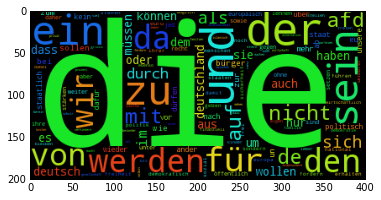

In [13]:
get_wc([w.lower() for w in lemmatized])

In [14]:
from nltk.corpus import stopwords
stop = stopwords.words('german')

def get_wc(wordlist, stopwords):
    wc_text = ' '.join([w.lower() for w in wordlist])
    wc = WordCloud(stopwords=stopwords).generate(wc_text)
    plt.imshow(wc)

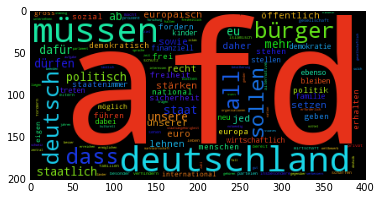

In [15]:
get_wc(lemmatized, stop)

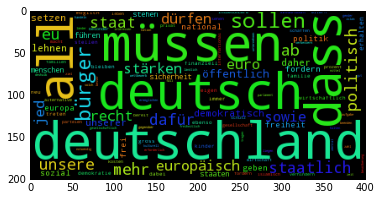

In [16]:
stop.append('afd')
get_wc(lemmatized, stop)

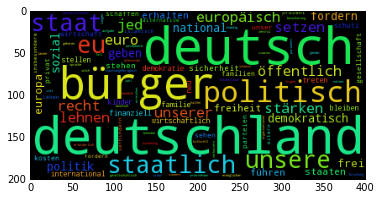

In [17]:
stop = [w.replace('\n', '') for w in open('stopwords_afd.txt').readlines()] + ['all']
get_wc(lemmatized, stop)

In [18]:
lemmatized_phrases = [''.join(TextBlob(p).words.lemmatize()) for p in noun_phrases]

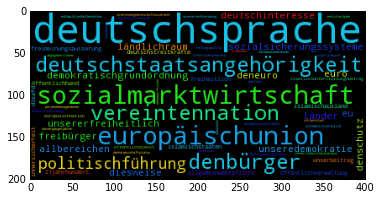

In [19]:
get_wc(lemmatized_phrases, stop)

In [20]:
from collections import Counter

def get_occurences(items):
    return [(i, Counter(items).get(i)) for i in list(set(items))]

def show_occurences(items, first=10):
    occurences = sorted(get_occurences(items), key=lambda x: x[1], reverse=True)
    for o in occurences[:first]:
        print('{}: {}'.format(o[0], o[1]))

In [21]:
show_occurences(noun_phrases)

deutsche Sprache: 6
Sozialen Marktwirtschaft: 5
den Bürger: 5
deutsche Staatsangehörigkeit: 4
den Schutz: 4
Vereinten Nationen: 4
deutschen Streitkräfte: 3
Schweizer Vorbild: 3
sozialen Sicherungssysteme: 3
Europäische Union: 3


In [22]:
def lemmatize_phrase(phrase):
    words = TextBlob(phrase).words.lemmatize()
    return ' '.join([w.lower() for w in words if w])
    
lemmatized_phrases = [lemmatize_phrase(p) for p in noun_phrases]

show_occurences(lemmatized_phrases)

deutsch sprache: 9
sozial marktwirtschaft: 8
europäisch union: 6
deutsch staatsangehörigkeit: 6
den bürger: 5
den schutz: 4
vereinten nation: 4
politisch führung: 4
inner sicherheit: 3
ländlich raum: 3


In [49]:
from nltk.util import ngrams

In [50]:
ngram_words = [w.lower() for w in lemmatized]

In [51]:
parts = [' '.join(n) for n in ngrams(ngram_words, 3)]
parts[:10]

['frei bürger sein',
 'bürger sein kein',
 'sein kein untertanen',
 'kein untertanen das',
 'untertanen das parteiprogramm',
 'das parteiprogramm der',
 'parteiprogramm der alternative',
 'der alternative für',
 'alternative für deutschland',
 'für deutschland a']

In [52]:
show_occurences(parts)

die afd wollen: 20
werden die afd: 12
afd setzen sich: 11
die afd fordern: 11
wir wollen die: 11
die afd setzen: 10
alternative für deutschland: 10
treten dafür ein: 9
afd wollen die: 9
die alternative für: 9


In [54]:
def ngrams_stat(words, n, stop, first=10):
    parts = [' '.join(g) for g in ngrams(words, n)]
    stop_set = set(stop)
    cleaned = [p for p in parts if not 
               stop_set.intersection(p.split(' '))]
    
    show_occurences(cleaned, first)

In [58]:
ngrams_stat(ngram_words, 3, stop)

‒ ‒ ‒: 7
unserer freiheitlich-demokratisch grundordnung: 3
stets bewusst bleiben: 2
sicherheitspolitisch interessen deutschlands: 2
leitkultur selbstbewusst verteidigen: 2
kriminalisierung unbescholtener bürger: 2
thema stattfinden abstimmungsfragen: 2
stattfinden abstimmungsfragen finanziell: 2
demokratisch strukturen organisieren: 2
steuerlich existenzminimum leben: 2


In [59]:
ngrams_stat(ngram_words, 2, stop)

‒ ‒: 10
deutsch sprache: 9
sozial marktwirtschaft: 9
politisch klasse: 6
europäisch union: 6
deutsch staatsangehörigkeit: 6
freiheitlich-demokratisch grundordnung: 5
schweiz vorbild: 5
national interessen: 4
milliarde euro: 4


In [62]:
show_occurences([w.lower() for w in lemmatized if w.lower() not in stop])

deutsch: 95
deutschland: 89
bürger: 62
politisch: 52
staatlich: 47
staat: 39
europäisch: 37
stärken: 36
jed: 34
setzen: 32


In [66]:
from nltk.stem.snowball import GermanStemmer
stemmer = GermanStemmer()
new_lemmatized_words = [stemmer.stem(w) for w in words]

In [70]:
show_occurences([w for w in new_lemmatized_words if w not in stop])

fur: 289
werd: 171
deutschland: 114
deutsch: 102
polit: 82
woll: 80
burg: 80
staat: 75
konn: 58
europa: 58


In [72]:
ngrams_stat(new_lemmatized_words, 2, stop)

fur deutschland: 15
alternativ fur: 10
‒ ‒: 10
werd konn: 10
landlich raum: 10
sozial marktwirtschaft: 9
deutsch sprach: 9
polit klass: 6
tret dafur: 6
fur arbeit: 6


In [1]:
# design word cloud

In [4]:
from PIL import Image
import numpy as np
from wordcloud import ImageColorGenerator

In [50]:
mask = np.array(Image.open('afd.png'))
coloring = ImageColorGenerator(mask)
text = ' '.join([w.lower() for w in lemmatized])

In [74]:
wc = WordCloud(background_color="white", stopwords=list(stop)+['jed',], color_func=coloring, width=800, height=600)

In [75]:
wc.generate(text)

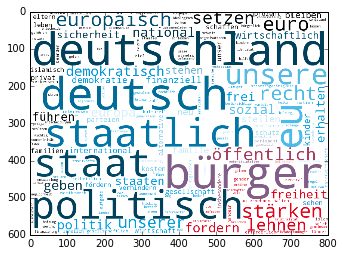

In [76]:
plt.imshow(wc)

In [77]:
wc.to_file('afd_cloud.jpg')